In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def name_dataset(df, name):
    df['dataset'] = name
    return df

def plot_num_iterations_vs_output(df, output_var, num_mutants_per_round):
    # Filter the DataFrame based on num_mutants_per_round
    filtered_df = df[df['num_mutants_per_round'] == num_mutants_per_round]

    # Get unique datasets from the DataFrame
    datasets = filtered_df['dataset'].unique()

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Create a color map for datasets
    color_map = plt.get_cmap('tab20')

    # Plot each dataset as a separate line
    for i, dataset in enumerate(datasets):
        dataset_df = filtered_df[filtered_df['dataset'] == dataset]
        x_values = dataset_df['num_iterations']
        y_values = dataset_df[output_var]
        color = color_map(i)
        label = f'{dataset}'
        ax.plot(x_values, y_values, color=color, marker='o', label=label)

    # Set plot labels and title
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel(output_var)
    ax.set_title(f'{output_var} vs. Number of Iterations (num_mutants_per_round={num_mutants_per_round}), esm2')

    # Add legend to the right side of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()

In [4]:
file_names_list = ["kelsic", "brenan", "stiffler", "markin", "giacomelli", "jones",  "haddox", "doud", "lee"]
scaled_dfs = []

for file_name in file_names_list:
    # Read the file
    file_path = file_name + "_esm2_t33_650M_UR50D_results.csv"
    print(file_path)
    df = pd.read_csv(file_path)

    # Print the number of rows in the dataframe
    print("Number of rows in the dataframe:", len(df))
    
    # Scale the columns
    df_scaled = name_dataset(df, file_name)

    # Save the scaled dataframe in the list
    scaled_dfs.append(df_scaled)

# Concatenate all the scaled dataframes
df = pd.concat(scaled_dfs)

kelsic_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
brenan_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
stiffler_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
markin_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
giacomelli_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
jones_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
haddox_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
doud_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10
lee_esm2_t33_650M_UR50D_results.csv
Number of rows in the dataframe: 10


In [5]:
df

,num_iterations,measured_var,learning_strategy,num_mutants_per_round,embedding_type,regression_type,first_median_fitness_scaled,first_top_fitness_scaled,first_fitness_binary_percentage,last_top_fitness_scaled,last_median_fitness_scaled,last_fitness_binary_percentage,change_median_fitness_scaled,change_top_fitness_scaled,change_fitness_binary_percentage,dataset
0,2,fitness,top10,16,embeddings,randomforest,0.865322,0.932930,0.400000,0.932930,0.865322,0.400000,0.000000,0.000000,0.000000,kelsic
1,3,fitness,top10,16,embeddings,randomforest,0.882692,0.930131,0.352941,0.930326,0.897659,0.482353,0.014968,0.000196,0.129412,kelsic
2,4,fitness,top10,16,embeddings,randomforest,0.888840,0.928475,0.400000,0.936634,0.908459,0.741176,0.019619,0.008159,0.341176,kelsic
3,5,fitness,top10,16,embeddings,randomforest,0.883792,0.930449,0.323529,0.945233,0.918812,0.864706,0.035020,0.014784,0.541176,kelsic
4,6,fitness,top10,16,embeddings,randomforest,0.887263,0.933437,0.447059,0.949395,0.919344,0.888235,0.032080,0.015958,0.441176,kelsic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,7,fitness,top10,16,embeddings,randomforest,0.016230,0.270552,0.111765,0.354075,0.061406,0.376471,0.045176,0.083523,0.264706,lee
6,8,fitness,top10,16,embeddings,randomforest,0.016084,0.378070,0.211765,0.518184,0.093328,0.511765,0.077245,0.140114,0.300000,lee
7,9,fitness,top10,16,embeddings,randomforest,0.016360,0.250683,0.111765,0.368633,0.091270,0.476471,0.074910,0.117950,0.364706,lee
8,10,fitness,top10,16,embeddings,randomforest,0.026462,0.283864,0.135294,0.475146,0.091740,0.541176,0.065278,0.191282,0.405882,lee


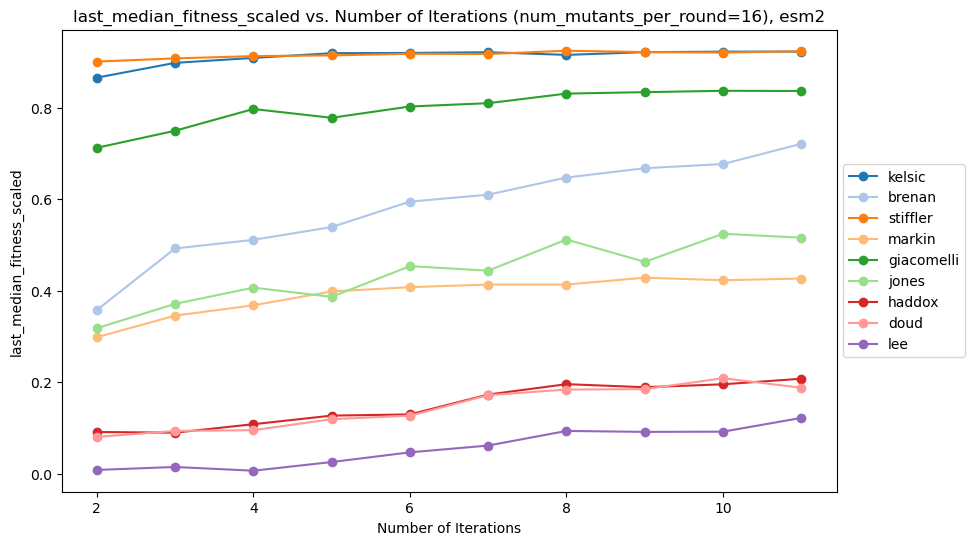

In [6]:
plot_num_iterations_vs_output(df, 'last_median_fitness_scaled', num_mutants_per_round=16)

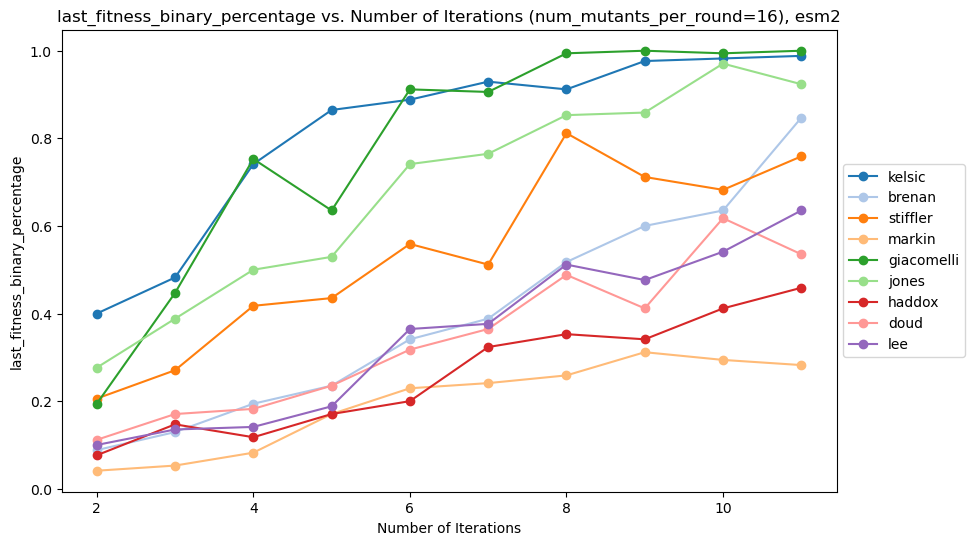

In [7]:
plot_num_iterations_vs_output(df, 'last_fitness_binary_percentage', num_mutants_per_round=16)

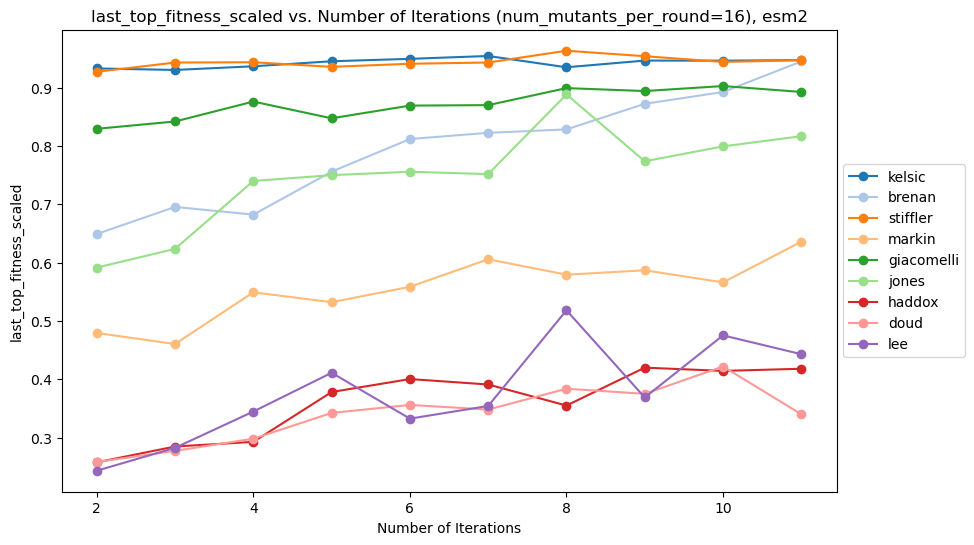

In [8]:
plot_num_iterations_vs_output(df, 'last_top_fitness_scaled', num_mutants_per_round=16)